<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.503 · Programación para la ciencia de datos</p>
    <p style="margin: 0; text-align:right;">Grado en Ciencia de datos aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Programación para la ciencia de datos
============================

--- 

Caso de ejemplo: Análisis de la estructura a gran escala del Universo
-----------------------------------------------------

---


## 1. Introducción

Observando la distribución de galaxias del Universo se encuentran ciertas estructuras a gran escala (escalas mucho mayores que la de una galaxia individual o grupos de galaxias) que nos dan información muy valiosa sobre la histor del Universo, así como de su contenido. Muchos experimentos se dedican a catalogar las galaxias a distintas distancias de la Tierra para tener una imagen completa y profunda de nuestro Universo, al menos desde nuestro punto de vista, desde la Tierra. Aquí mostramos una imagen de como están distribuidas las galaxias, donde podemos ver estructuras en forma de filamentos (la Tierra estaría situada en el centro de la imagen):

<img src="figs/large-scalestructure2+0.gif">

Utilizando solo la posición de las galaxias se puede extraer mucha información de nuestro Universo, ya que la forma en la que están distribuídas depende, por ejemplo, de la candidad de energía oscura, materia oscura o de la velocidad de expansión del Universo. La manera más sencilla y potente de sacar esta información es usando la **función de correlación**. Cuando hablamos de función de correlación en astronomía se hace referencia a la función de autocorrelación a 2 puntos. Esta función permite cuantificar de manera sencilla la agrupación de una serie puntos de datos, en nuestro caso galaxias. La función de autocorrelación a 2 puntos basicamente nos dice a qué distancias de separación hay más o menos galaxias. 


Partiendo de las posiciones de las galaxias calcularemos la función de correlación $\xi(r)$. Hay diferentes estimadores para esta función, y aquí usaremos uno de los más senzillos de calcular, el **estimador natural**:

\begin{equation}
\xi^N(r) = \frac{DD}{RR} -1
\end{equation}

donde $DD$ es el número de pares del catálogo a una distáncia entre $r-dr$ i $r+dr$ y $RR$ es el número de pares que se encuentran a una distancia entre $r-dr$ y $r+dr$ de una muestra simulada homogenea e isótropa.


## 2. Datos
Usaremos una parte del catálogo de galaxies **2dF Gaaxy Redshift Survey**, que podéis encontrar en el fichero `2dF190N_dat.csv` (en la carpeta `data`). Podéis encontrar más información sobre el *survey* y los datos en la página http://www.2dfgrs.net/.

In [7]:
# Cargamos los datos con pandas
import pandas as pd
data = pd.read_csv('data/2dF190N_dat.csv')
data

,x,y,z,ra,dec,Com.dist,comp
0,-129.9092,69.2506,-8.9853,2.6518,-0.0610,147.4883,0.922414
1,-158.2375,84.5103,-10.6828,2.6511,-0.0595,179.7087,0.922414
2,-158.2599,84.5924,-9.6520,2.6507,-0.0537,179.7087,0.982759
3,-316.0262,168.8260,-20.0912,2.6509,-0.0560,358.8571,0.982759
4,-99.6936,53.3456,-5.1115,2.6503,-0.0452,113.1843,0.930233
...,...,...,...,...,...,...,...
14242,-231.2095,-120.5529,9.7705,3.6222,0.0375,260.9335,0.715447
14243,-279.7068,-145.7881,-0.7835,3.6221,-0.0025,315.4214,0.679612
14244,-240.5887,-125.3165,9.2816,3.6218,0.0342,271.4282,0.715447
14245,-209.8086,-109.2498,5.6562,3.6217,0.0239,236.6161,0.715447


In [8]:
data.tail()

,x,y,z,ra,dec,Com.dist,comp
14242,-231.2095,-120.5529,9.7705,3.6222,0.0375,260.9335,0.715447
14243,-279.7068,-145.7881,-0.7835,3.6221,-0.0025,315.4214,0.679612
14244,-240.5887,-125.3165,9.2816,3.6218,0.0342,271.4282,0.715447
14245,-209.8086,-109.2498,5.6562,3.6217,0.0239,236.6161,0.715447
14246,-330.2141,-171.9119,2.0870,3.6216,0.0056,372.2895,0.679612


En el fichero solo hemos dejado la información relativa a la posición de las galaxias: coordenadas cartesianas (`x`, `y`, `z`), coordenadas ecuatoriales ([ascensión recta](https://en.wikipedia.org/wiki/Right_ascension), `ra`, i [declinación](https://en.wikipedia.org/wiki/Declination), `dec`) y la distancia del objeto a la Tierra (`Com.dist`). 

Las observaciones estan tomadas desde observatorios terrestres, de tal manera que hay ciertas limitaciones en términos de posiciones observables, ya que estas dependen de las coordenadas del telescopio y de la profundidad que es capaz de observar. Los límites en las coordenadas ecuatoriales y la distancia son: 
* $RA_{min} = 2.600541$ rad, 
* $RA_{max} = 3.647738$ rad, 
* $dec_{min} = -0.078540$ rad, 
* $dec_{max} = 0.043633$ rad, 
* $Dist_{min} = 61.121357$ $h^{-1}$Mpc, 
* $Dist_{max} = 375.585144$ $h^{-1}$Mpc. 

Estos valores nos serán útiles para generar el catálogo simulado. 

## 3. Análisis de los datos

### 3.1.  Generación del catálogo simulado

Para calcular $\xi(r)$ mediante el estimador natural, necesitamos generar primero un catálogo simulado del mismo tamaño que el original pero con densidad de galaxias constante. Para obtener densidad constante necesitamos una distribución uniforme por diferencial de volumen.

Al observar el cielo desde la Tierra lo que tenemos es una esfera. Por lo tanto, tiraremos números aleatorios en coordenadas esféricas $\rho$, $\theta$ y $\phi$ ($\rho$ es la distància al centro, $\theta= 90^{\circ}- dec$ y $\phi=ra$). El diferencial de volumen $dV = dxdydz$ en coordenades esféricas es:

$$dV=d(\frac{\rho^3}{3})d(\cos(\theta))d\phi)$$

Si nos fijamos, para  mantener una densitat constante en toda la esfera, deberíamos tener más puntos en la parte externa que en la interna ya que en la parte externa hay más espacio que "rellenar". Esto lo conseguimos si hacemos que lo que siga una distribución uniforme sea $\frac{\rho^3}{3}$ y no $\rho$ como podríamos estar tentados a hacer. Esto lo podemos ver con un ejemplo de un corte de dos esferas, en una lanzando puntos con distribución de $\rho$ uniforme y en la otra con $\frac{\rho^3}{3}$ uniforme:  
<img src="figs/slices.png">

In [9]:
# Podemos hacer el ejercicio usando las funciones de numpy
import numpy as np
import matplotlib.pyplot as plt

# Para cada diferencial de volumen queremos el mismo número de galaxias.
# dV = d(ro^3/3)d(sin(dec))d(ra)  --> para angúlos pequeños sin(dec) ~ dec

def ro_t(x):
    """ returns the result of x^3/3 """
    return x**3/3

# definimos función para generar el catálogo simulado

def simulateCatalog(limits, n_gal, plotRho = False):
    """A simulated catalogue of n_gal galaxies is returned in the given limits
    
       Args:
         limits: (:obj:`dict`): with keys "Dist_min", "Dist_max", "dec_min","dec_max","ra_min","ra_max"
         n_gal:  (:obj:`int`)
         
       Optional Args:
         plotRho: (:obj:`boolean`): Returns plot to see distribution of rho. 
                  
       Retruns:
         pos_cat: (:obj:`numpy array` with shape n_gal x 3): position in cartesian coordinates of the n_gal galaxies
    
    """
    if not isinstance(limits, dict):
        print('Input must by a dictionary')
        return False
    else:
        if "Dist_min" not in limits or "Dist_max" not in limits:
             raise AssertionError('Dist_min and Dist_max keys must be given')
        if "dec_min" not in limits or  "dec_max" not in limits:
             raise AssertionError('dec_min and dec_max keys must be given')
        if "ra_min" not in limits or "ra_max" not in limits:
             raise AssertionError('ra_min and ra_max keys must be given')
                   
        # Generem nombres aleatoris uniformes, amb els límits imposats 
        # i el mateix número de galàxies que el catàleg real
        ro3 = np.random.uniform(low=ro_t(limits["Dist_min"]),
                        high=ro_t(limits["Dist_max"]), size=n_gal)  
        dec = np.random.uniform(low=limits["dec_min"],
                        high=limits["dec_max"], size=n_gal)
        ra = np.random.uniform(low=limits["ra_min"],
                        high=limits["ra_max"], size=n_gal)

        # Volvemos a las coordenadas ecuatoriales 
        ro = (3*ro3)**(1/3)
        
        if plotRho:
            _ = plt.hist(ro)  # ( _ = added to avoid unnecesary text with plot info )
            plt.xlabel(r'$\rho$')
            plt.ylabel('Number of galaxies')

        # Convertimos a coordenadas cartesianas y agrupamos en vectores
        x_cat = ro * np.cos(dec) * np.cos(ra)
        y_cat = ro * np.cos(dec) * np.sin(ra)
        z_cat = ro * np.sin(dec)
        pos_cat = np.column_stack((x_cat, y_cat, z_cat))
        
        return pos_cat 
               

Generamos un catálogo simulado llamando a la función con los límites de nuestra muestra enumerados más arriba. Como hemos comentado antes, para generar los números aleatorios hemos usado $\frac{\rho^3}{3}$ de tal manera que a mayor distància haya más galaxias y mantener la densidad de galaxias constante. Podemos ver la distribución final de $\rho$ utilizando la opción PlotRho = True:

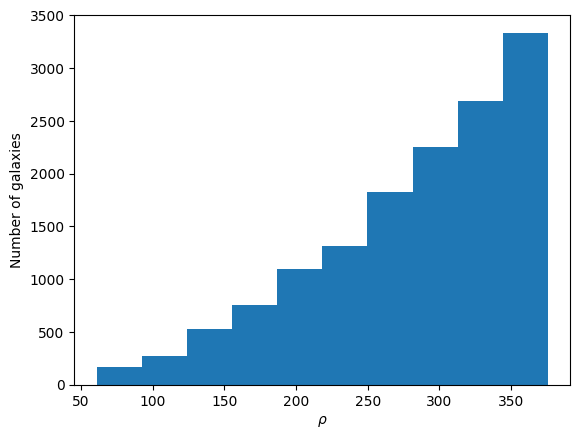

In [10]:
limits = {'ra_min': 2.600541, 'ra_max': 3.647738,
          "dec_min": -0.078540, "dec_max": 0.043633,
          "Dist_min": 61.121357, "Dist_max": 375.585144}

p_cat = simulateCatalog(limits, len(data), plotRho = True)

Una vez generado el catálogo simulado, solo tendremos que calcular la distancia entre cada par de galaxias e ir contando cuantas hay separadas con la misma distancia ($dr - r < r < r + dr$). 

### 3.2 Cálculo del estimador

In [11]:
# Tenemos que calcular el número de galaxias que hay a cierta distancia, tanto del catálogo real como del
# catálogo aleatorio. Utilizaremos Counter del módulo collections

from collections import Counter


# Definimos la distancia entre 2 puntos 
def dist3D(p1, p2):
    """ compute euclidian distance between two points p1 and p2"""
    if len(p1) != len(p2):
        raise AssertionError("x1 and x2 must be equal")
    suma = sum([(p1[i]-p2[i])**2 for i in range(len(p1))])
    return np.sqrt(suma)


# Generamos vectores con las coordenadas 
p = np.column_stack((np.array(data["x"]),
                     np.array(data["y"]), np.array(data["z"])))

# Generamos bines entre distancia mínima y máximacon pasos de uno en uno
maxDist = 350
dr = 1   # esogemos dr = 1 
bins = np.arange(0, maxDist, dr)  # generamos intérvalos de distancia


for i in range(len(p)):
    distances = np.array([dist3D(p[i], p[j]) for j in range(i+1, len(p))])
    distances_cat = np.array([dist3D(p_cat[i], p_cat[j]) for j in range(i+1, len(p))])

    digitized = np.digitize(distances, bins)          # colocamos cada distancia a su intérvalo
    digitized_cat = np.digitize(distances_cat, bins)  

    if i == 0:
        DDc = Counter(digitized)       # utilizamos Counter para contar cuantas distancias hay iguales
        RRc = Counter(digitized_cat)

    else:
        DDc.update(digitized)          # actualizamos contadores
        RRc.update(digitized_cat)

# Ordenamos DDc i RRc
DDsorted = {k: v for k, v in sorted(DDc.items())}
RRsorted = {k: v for k, v in sorted(RRc.items())}

# Lo pasamos a listas
r = list(DDsorted.keys())     # distancia
DD = list(DDsorted.values())  # número de pares del catálogo real
RR = list(RRsorted.values())  # número de pares del catálogo simulado

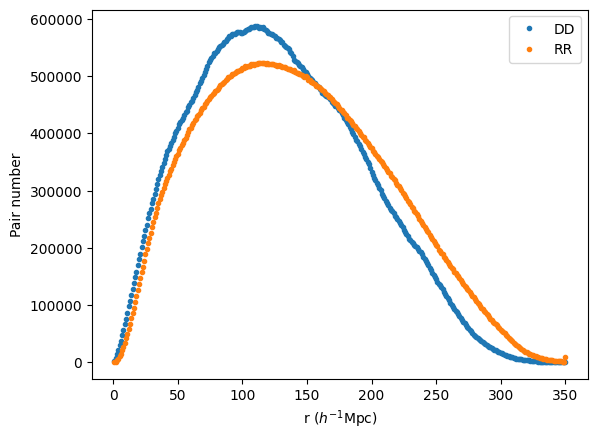

In [12]:
# Podemos ver que DD y RR son diferentes:
plt.plot(r, DD, '.', label='DD')
plt.plot(r, RR, '.', label='RR')
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel('Pair number')
plt.legend()

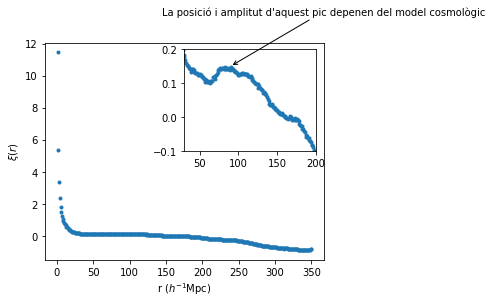

In [8]:
# Calculamos estimador natural
corr = np.array(DD)/np.array(RR) - 1

# Hacemos los gráficos
fig, ax = plt.subplots(figsize=[5, 4])
# Fem el gràfic
ax.plot(r, corr, '.')
ax.set_xlabel("r ($h^{-1}$Mpc)")
ax.set_ylabel(r"$\xi(r)$")

axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
axins.plot(r, corr, '.')
# sub region of the original image
x1, x2, y1, y2 = 30, 200, -0.1, 0.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
_ = axins.annotate("La posició i amplitut d'aquest pic depenen del model cosmològic",
                   xy=(90, 0.15), xycoords='data',
                   xytext=(0.3, 0.3), textcoords='data',
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3")
                   )

### 3.3 Interpretación de los resultados
La fuerza de la gravedad hace que las galaxias se atraigan y se agrupen en cúmulos, por eso a distancias relativamente pequeñas 
(1$h^{-1}$Mpc $\sim 4.3·10^{18}$ m) la función der correlación es máxima. Como la fuerza de la gravedad es inversamente proporcional al cuadrado de la distancia, a medida que aumentamos la distancia entre galaxias encontramos menos agrupamiento o *clustering*. Pero alrededor de 100$h^{-1}$Mpc, encontramos un ligero pico, que está relacionado con las primeras fluctuaciones de materia del Universo primitivo. 

En el Universo primitivo convivían partículas fundamentales libres como fotones, materia oscura (materia de naturaleza desconocida) y materia bariónica (partículas de materia ordinaria que conocemos como los protones o neutrones). La materia tiende a agruparse toda, la ordinaria con la oscura, y cuanto más materia hay más atrae materia de su entorno.

Una característica de la materia oscura es que no actúa con la radiación electromagnética (la luz, o los fotones), por eso se le llama oscura. En cambio, los fotons y la matería bariónica sí que pueden interaccionar y la presión de los fotones en ese momeno  era lo suficientemente fuerte para separa la materia oscura de la materia bariónica.
La matería atraída por la fuerza de la gravedad, intentava volver hacía la materia oscura, y se formaron los que se llama ondas acústicas (BAOs por *baryon acoustic oscillations*).

Estas ondas podían viajar a una cierta distancia, dependiendo de la veolcidad a la que se movia la onda y del tiempo que hubiera tenido para moverse, es decir la edad del Universo. Una vez el Univeso se enfría, estas oscilaciones se "congelan" y la materia bariónica que allí donde la dejó la onda acústica, separada del grueso de la materia oscura. Estas primeras distribuciones de materia, son las semillas de las futuras estrellas y galaxias. Por eso, debido a este baile inicial vemos un pico en la función de correlación de las galaxias actuales a una certa distància. 

Pero también tenemos que tener en cuenta todo lo que ha ido pasando desde el Universo primitivo hasta el momento en el que lo observamos. La energía oscura, hacer que el Universo se expanda aceleradamente y contrarreste la fuerza de la gravedad. Si no hubiera energía oscura, las galaxias estarían más agrupadas y las distancias entre galacias se hubieran ido reduciendo más, y hoy en día este efecto habría quedado porque la gravedad habría ya llevado esas galaxias distanciadas hasta las zonas con más acumulación de masa. Esto hubiera hecho desaparecer ese pico en la funicón de correlación.

En la realidad, se usan estimadores más precisos y catálogos más grandes, de hecho se están actualizando constantemente. Pero con este sencillo ejercicio podemos ver como se puede obtener información de la composición y otras características de nuestro Universo solo estudiando las posiciones de las galaxias que observamos desde una posición (relativamente) fija del Universo.

# 4. Bibliografía adicional

Aunque se podrían haver implementado todas las funciones, hemos optado por usar opciones ya implementadas en algunos de los módulos típicos de Python. Aquí podéis encontrar información sobre [column_stack](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html), [digitize](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html) del paquete numpy, así como del objeto [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) del módulo collections.

Para más información sobre lo que se ha discutido en este ejemplo podéis ver la entrada de la Wikipedia sobre  [Baryon Acoustic Oscillations](https://en.wikipedia.org/wiki/Baryon_acoustic_oscillations) y si tenéis más interéis aquí os dejamos las referencias de algunos artículos científicos que podéis revisar:

Sobre estimadores de la función de correlación en astrofísica:

* *A comparison of estimators for the two–point correlation function*, Kerscher M., Szapudi I., Szalay1 A.S, 2000, The Astrophysical Journal, Volume 535, Issue 1, pp. L13-L16.

Sobre BAOs:

* *Detection of the Baryon Acoustic Peak in the Large-Scale Correlation Function of SDSS Luminous Red Galaxies*, Eisenstein et al. 2005, The Astrophysical Journal, Volume 633, Issue 2, pp. 560-574.

* *Cosmological constraints from baryonic acoustic oscillation measurements.* Jean-Marc Le Goff and Vanina Ruhlmann-Kleider, 2015, Scholarpedia, 10(9):32149.


